# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp17 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [9]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [10]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [11]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1326222778421350401
1326222778270322688
1326222779621007361
1326222779373539329
1326222780212318208
1326222782024327175
1326222782506610688
1326222782905131018
1326222783366524934
1326222783790149632
1326222784712773632
1326222785203482624
1326222785522307081
1326222786319151104
1326222786612883474
1326222787732713473
1326222789271941120
1326222789368553472
1326222790257733641
1326222790438117376
1326222790698037250
1326222790417129475
1326222791557910532
1326222790933049346
1326222791969009667
1326222793248301059
1326222795060162562
1326222795668328448
1326222796096036864
1326222796087844869
1326222796305915906
1326222796813381632
1326222795483738113
1326222797102780422
1326222798092693504
1326222798231048194
1326222800911282181
1326222801179652097
1326222801875980288
1326222802010124289
1326222801762721792
1326222803872387073
1326222804254142467
1326222805676003328
1326222805755629571
1326222805873078273
1326222806523113474
1326222807605276672
1326222808448446465
1326222808498794497


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [12]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [13]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [14]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Tue Nov 10 17:59:13 +0000 2020'
'Tue Nov 10 17:59:12 +0000 2020'
'Tue Nov 10 17:59:12 +0000 2020'
'Tue Nov 10 17:59:12 +0000 2020'
'Tue Nov 10 17:59:12 +0000 2020'
'Tue Nov 10 17:59:12 +0000 2020'
'Tue Nov 10 17:59:12 +0000 2020'
'Tue Nov 10 17:59:12 +0000 2020'
'Tue Nov 10 17:59:12 +0000 2020'
'Tue Nov 10 17:59:11 +0000 2020'
'Tue Nov 10 17:59:11 +0000 2020'
'Tue Nov 10 17:59:11 +0000 2020'
'Tue Nov 10 17:59:11 +0000 2020'
'Tue Nov 10 17:59:11 +0000 2020'
'Tue Nov 10 17:59:11 +0000 2020'
'Tue Nov 10 17:59:11 +0000 2020'
'Tue Nov 10 17:59:10 +0000 2020'
'Tue Nov 10 17:59:10 +0000 2020'
'Tue Nov 10 17:59:10 +0000 2020'
'Tue Nov 10 17:59:10 +0000 2020'
'Tue Nov 10 17:59:09 +0000 2020'
'Tue Nov 10 17:59:09 +0000 2020'
'Tue Nov 10 17:59:09 +0000 2020'
'Tue Nov 10 17:59:09 +0000 2020'
'Tue Nov 10 17:59:09 +0000 2020'
'Tue Nov 10 17:59:08 +0000 2020'
'Tue Nov 10 17:59:08 +0000 2020'
'Tue Nov 10 17:59:08 +0000 2020'
'Tue Nov 10 17:59:08 +0000 2020'
'Tue Nov 10 17:59:08 +0000 2020'
'Tue Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [15]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Tue Nov 10 17:58:52 +0000 2020'
'Tue Nov 10 17:58:44 +0000 2020'
'Tue Nov 10 17:58:44 +0000 2020'
'Tue Nov 10 17:58:43 +0000 2020'
'Tue Nov 10 17:58:43 +0000 2020'
'Tue Nov 10 17:58:43 +0000 2020'
'Tue Nov 10 17:58:43 +0000 2020'
'Tue Nov 10 17:58:42 +0000 2020'
'Tue Nov 10 17:58:42 +0000 2020'
'Tue Nov 10 17:58:42 +0000 2020'
'Tue Nov 10 17:58:42 +0000 2020'
'Tue Nov 10 17:58:42 +0000 2020'
'Tue Nov 10 17:58:42 +0000 2020'
'Tue Nov 10 17:58:41 +0000 2020'
'Tue Nov 10 17:58:41 +0000 2020'
'Tue Nov 10 17:58:41 +0000 2020'
'Tue Nov 10 17:58:41 +0000 2020'
'Tue Nov 10 17:58:41 +0000 2020'
'Tue Nov 10 17:58:41 +0000 2020'
'Tue Nov 10 17:58:41 +0000 2020'
'Tue Nov 10 17:58:41 +0000 2020'
'Tue Nov 10 17:58:40 +0000 2020'
'Tue Nov 10 17:58:40 +0000 2020'
'Tue Nov 10 17:58:40 +0000 2020'
'Tue Nov 10 17:58:39 +0000 2020'
'Tue Nov 10 17:58:39 +0000 2020'
'Tue Nov 10 17:58:39 +0000 2020'
'Tue Nov 10 17:58:39 +0000 2020'
'Tue Nov 10 17:58:38 +0000 2020'
'Tue Nov 10 17:58:38 +0000 2020'
'Tue Nov 1

'Tue Nov 10 17:57:58 +0000 2020'
'Tue Nov 10 17:57:58 +0000 2020'
'Tue Nov 10 17:57:58 +0000 2020'
'Tue Nov 10 17:57:57 +0000 2020'
'Tue Nov 10 17:57:57 +0000 2020'
'Tue Nov 10 17:57:57 +0000 2020'
'Tue Nov 10 17:57:57 +0000 2020'
'Tue Nov 10 17:57:57 +0000 2020'
'Tue Nov 10 17:57:57 +0000 2020'
'Tue Nov 10 17:57:56 +0000 2020'
'Tue Nov 10 17:57:56 +0000 2020'
'Tue Nov 10 17:57:56 +0000 2020'
'Tue Nov 10 17:57:56 +0000 2020'
'Tue Nov 10 17:57:56 +0000 2020'
'Tue Nov 10 17:57:56 +0000 2020'
'Tue Nov 10 17:57:55 +0000 2020'
'Tue Nov 10 17:57:55 +0000 2020'
'Tue Nov 10 17:57:55 +0000 2020'
'Tue Nov 10 17:57:55 +0000 2020'
'Tue Nov 10 17:57:55 +0000 2020'
'Tue Nov 10 17:57:55 +0000 2020'
'Tue Nov 10 17:57:55 +0000 2020'
'Tue Nov 10 17:57:55 +0000 2020'
'Tue Nov 10 17:57:54 +0000 2020'
'Tue Nov 10 17:57:54 +0000 2020'
'Tue Nov 10 17:57:54 +0000 2020'
'Tue Nov 10 17:57:54 +0000 2020'
'Tue Nov 10 17:57:54 +0000 2020'
'Tue Nov 10 17:57:54 +0000 2020'
'Tue Nov 10 17:57:54 +0000 2020'
'Tue Nov 1

'Tue Nov 10 17:57:09 +0000 2020'
'Tue Nov 10 17:57:09 +0000 2020'
'Tue Nov 10 17:57:09 +0000 2020'
'Tue Nov 10 17:57:09 +0000 2020'
'Tue Nov 10 17:57:09 +0000 2020'
'Tue Nov 10 17:57:08 +0000 2020'
'Tue Nov 10 17:57:08 +0000 2020'
'Tue Nov 10 17:57:08 +0000 2020'
'Tue Nov 10 17:57:08 +0000 2020'
'Tue Nov 10 17:57:08 +0000 2020'
'Tue Nov 10 17:57:08 +0000 2020'
'Tue Nov 10 17:57:08 +0000 2020'
'Tue Nov 10 17:57:08 +0000 2020'
'Tue Nov 10 17:57:07 +0000 2020'
'Tue Nov 10 17:57:07 +0000 2020'
'Tue Nov 10 17:57:07 +0000 2020'
'Tue Nov 10 17:57:07 +0000 2020'
'Tue Nov 10 17:57:07 +0000 2020'
'Tue Nov 10 17:57:06 +0000 2020'
'Tue Nov 10 17:57:06 +0000 2020'
'Tue Nov 10 17:57:06 +0000 2020'
'Tue Nov 10 17:57:05 +0000 2020'
'Tue Nov 10 17:57:05 +0000 2020'
'Tue Nov 10 17:57:05 +0000 2020'
'Tue Nov 10 17:57:05 +0000 2020'
'Tue Nov 10 17:57:05 +0000 2020'
'Tue Nov 10 17:57:05 +0000 2020'
'Tue Nov 10 17:57:05 +0000 2020'
'Tue Nov 10 17:57:04 +0000 2020'
'Tue Nov 10 17:57:04 +0000 2020'
'Tue Nov 1

'Tue Nov 10 17:56:19 +0000 2020'
'Tue Nov 10 17:56:19 +0000 2020'
'Tue Nov 10 17:56:19 +0000 2020'
'Tue Nov 10 17:56:19 +0000 2020'
'Tue Nov 10 17:56:19 +0000 2020'
'Tue Nov 10 17:56:18 +0000 2020'
'Tue Nov 10 17:56:18 +0000 2020'
'Tue Nov 10 17:56:18 +0000 2020'
'Tue Nov 10 17:56:18 +0000 2020'
'Tue Nov 10 17:56:18 +0000 2020'
'Tue Nov 10 17:56:18 +0000 2020'
'Tue Nov 10 17:56:18 +0000 2020'
'Tue Nov 10 17:56:18 +0000 2020'
'Tue Nov 10 17:56:18 +0000 2020'
'Tue Nov 10 17:56:17 +0000 2020'
'Tue Nov 10 17:56:17 +0000 2020'
'Tue Nov 10 17:56:17 +0000 2020'
'Tue Nov 10 17:56:17 +0000 2020'
'Tue Nov 10 17:56:17 +0000 2020'
'Tue Nov 10 17:56:16 +0000 2020'
'Tue Nov 10 17:56:16 +0000 2020'
'Tue Nov 10 17:56:16 +0000 2020'
'Tue Nov 10 17:56:16 +0000 2020'
'Tue Nov 10 17:56:16 +0000 2020'
'Tue Nov 10 17:56:15 +0000 2020'
'Tue Nov 10 17:56:15 +0000 2020'
'Tue Nov 10 17:56:14 +0000 2020'
'Tue Nov 10 17:56:14 +0000 2020'
'Tue Nov 10 17:56:14 +0000 2020'
'Tue Nov 10 17:56:14 +0000 2020'
'Tue Nov 1

'Tue Nov 10 17:55:37 +0000 2020'
'Tue Nov 10 17:55:37 +0000 2020'
'Tue Nov 10 17:55:37 +0000 2020'
'Tue Nov 10 17:55:36 +0000 2020'
'Tue Nov 10 17:55:36 +0000 2020'
'Tue Nov 10 17:55:36 +0000 2020'
'Tue Nov 10 17:55:36 +0000 2020'
'Tue Nov 10 17:55:35 +0000 2020'
'Tue Nov 10 17:55:35 +0000 2020'
'Tue Nov 10 17:55:35 +0000 2020'
'Tue Nov 10 17:55:35 +0000 2020'
'Tue Nov 10 17:55:35 +0000 2020'
'Tue Nov 10 17:55:35 +0000 2020'
'Tue Nov 10 17:55:35 +0000 2020'
'Tue Nov 10 17:55:34 +0000 2020'
'Tue Nov 10 17:55:34 +0000 2020'
'Tue Nov 10 17:55:33 +0000 2020'
'Tue Nov 10 17:55:33 +0000 2020'
'Tue Nov 10 17:55:33 +0000 2020'
'Tue Nov 10 17:55:33 +0000 2020'
'Tue Nov 10 17:55:33 +0000 2020'
'Tue Nov 10 17:55:33 +0000 2020'
'Tue Nov 10 17:55:33 +0000 2020'
'Tue Nov 10 17:55:33 +0000 2020'
'Tue Nov 10 17:55:33 +0000 2020'
'Tue Nov 10 17:55:33 +0000 2020'
'Tue Nov 10 17:55:32 +0000 2020'
'Tue Nov 10 17:55:32 +0000 2020'
'Tue Nov 10 17:55:32 +0000 2020'
'Tue Nov 10 17:55:32 +0000 2020'
'Tue Nov 1

'Tue Nov 10 17:54:53 +0000 2020'
'Tue Nov 10 17:54:53 +0000 2020'
'Tue Nov 10 17:54:53 +0000 2020'
'Tue Nov 10 17:54:52 +0000 2020'
'Tue Nov 10 17:54:52 +0000 2020'
'Tue Nov 10 17:54:52 +0000 2020'
'Tue Nov 10 17:54:51 +0000 2020'
'Tue Nov 10 17:54:51 +0000 2020'
'Tue Nov 10 17:54:51 +0000 2020'
'Tue Nov 10 17:54:51 +0000 2020'
'Tue Nov 10 17:54:50 +0000 2020'
'Tue Nov 10 17:54:50 +0000 2020'
'Tue Nov 10 17:54:50 +0000 2020'
'Tue Nov 10 17:54:50 +0000 2020'
'Tue Nov 10 17:54:50 +0000 2020'
'Tue Nov 10 17:54:50 +0000 2020'
'Tue Nov 10 17:54:49 +0000 2020'
'Tue Nov 10 17:54:49 +0000 2020'
'Tue Nov 10 17:54:49 +0000 2020'
'Tue Nov 10 17:54:49 +0000 2020'
'Tue Nov 10 17:54:49 +0000 2020'
'Tue Nov 10 17:54:49 +0000 2020'
'Tue Nov 10 17:54:49 +0000 2020'
'Tue Nov 10 17:54:49 +0000 2020'
'Tue Nov 10 17:54:48 +0000 2020'
'Tue Nov 10 17:54:48 +0000 2020'
'Tue Nov 10 17:54:48 +0000 2020'
'Tue Nov 10 17:54:48 +0000 2020'
'Tue Nov 10 17:54:48 +0000 2020'
'Tue Nov 10 17:54:48 +0000 2020'
'Tue Nov 1

'Tue Nov 10 17:54:12 +0000 2020'
'Tue Nov 10 17:54:12 +0000 2020'
'Tue Nov 10 17:54:11 +0000 2020'
'Tue Nov 10 17:54:11 +0000 2020'
'Tue Nov 10 17:54:11 +0000 2020'
'Tue Nov 10 17:54:11 +0000 2020'
'Tue Nov 10 17:54:11 +0000 2020'
'Tue Nov 10 17:54:11 +0000 2020'
'Tue Nov 10 17:54:11 +0000 2020'
'Tue Nov 10 17:54:10 +0000 2020'
'Tue Nov 10 17:54:10 +0000 2020'
'Tue Nov 10 17:54:10 +0000 2020'
'Tue Nov 10 17:54:10 +0000 2020'
'Tue Nov 10 17:54:10 +0000 2020'
'Tue Nov 10 17:54:10 +0000 2020'
'Tue Nov 10 17:54:10 +0000 2020'
'Tue Nov 10 17:54:09 +0000 2020'
'Tue Nov 10 17:54:09 +0000 2020'
'Tue Nov 10 17:54:09 +0000 2020'
'Tue Nov 10 17:54:09 +0000 2020'
'Tue Nov 10 17:54:09 +0000 2020'
'Tue Nov 10 17:54:09 +0000 2020'
'Tue Nov 10 17:54:09 +0000 2020'
'Tue Nov 10 17:54:09 +0000 2020'
'Tue Nov 10 17:54:09 +0000 2020'
'Tue Nov 10 17:54:09 +0000 2020'
'Tue Nov 10 17:54:08 +0000 2020'
'Tue Nov 10 17:54:08 +0000 2020'
'Tue Nov 10 17:54:08 +0000 2020'
'Tue Nov 10 17:54:08 +0000 2020'
'Tue Nov 1

'Tue Nov 10 17:53:27 +0000 2020'
'Tue Nov 10 17:53:27 +0000 2020'
'Tue Nov 10 17:53:27 +0000 2020'
'Tue Nov 10 17:53:27 +0000 2020'
'Tue Nov 10 17:53:27 +0000 2020'
'Tue Nov 10 17:53:27 +0000 2020'
'Tue Nov 10 17:53:27 +0000 2020'
'Tue Nov 10 17:53:27 +0000 2020'
'Tue Nov 10 17:53:27 +0000 2020'
'Tue Nov 10 17:53:27 +0000 2020'
'Tue Nov 10 17:53:27 +0000 2020'
'Tue Nov 10 17:53:26 +0000 2020'
'Tue Nov 10 17:53:26 +0000 2020'
'Tue Nov 10 17:53:26 +0000 2020'
'Tue Nov 10 17:53:26 +0000 2020'
'Tue Nov 10 17:53:25 +0000 2020'
'Tue Nov 10 17:53:25 +0000 2020'
'Tue Nov 10 17:53:25 +0000 2020'
'Tue Nov 10 17:53:25 +0000 2020'
'Tue Nov 10 17:53:24 +0000 2020'
'Tue Nov 10 17:53:24 +0000 2020'
'Tue Nov 10 17:53:24 +0000 2020'
'Tue Nov 10 17:53:24 +0000 2020'
'Tue Nov 10 17:53:23 +0000 2020'
'Tue Nov 10 17:53:23 +0000 2020'
'Tue Nov 10 17:53:22 +0000 2020'
'Tue Nov 10 17:53:22 +0000 2020'
'Tue Nov 10 17:53:22 +0000 2020'
'Tue Nov 10 17:53:22 +0000 2020'
'Tue Nov 10 17:53:22 +0000 2020'
'Tue Nov 1

'Tue Nov 10 17:52:43 +0000 2020'
'Tue Nov 10 17:52:43 +0000 2020'
'Tue Nov 10 17:52:43 +0000 2020'
'Tue Nov 10 17:52:43 +0000 2020'
'Tue Nov 10 17:52:43 +0000 2020'
'Tue Nov 10 17:52:43 +0000 2020'
'Tue Nov 10 17:52:43 +0000 2020'
'Tue Nov 10 17:52:43 +0000 2020'
'Tue Nov 10 17:52:42 +0000 2020'
'Tue Nov 10 17:52:42 +0000 2020'
'Tue Nov 10 17:52:42 +0000 2020'
'Tue Nov 10 17:52:42 +0000 2020'
'Tue Nov 10 17:52:42 +0000 2020'
'Tue Nov 10 17:52:42 +0000 2020'
'Tue Nov 10 17:52:42 +0000 2020'
'Tue Nov 10 17:52:42 +0000 2020'
'Tue Nov 10 17:52:42 +0000 2020'
'Tue Nov 10 17:52:41 +0000 2020'
'Tue Nov 10 17:52:41 +0000 2020'
'Tue Nov 10 17:52:41 +0000 2020'
'Tue Nov 10 17:52:40 +0000 2020'
'Tue Nov 10 17:52:40 +0000 2020'
'Tue Nov 10 17:52:40 +0000 2020'
'Tue Nov 10 17:52:40 +0000 2020'
'Tue Nov 10 17:52:40 +0000 2020'
'Tue Nov 10 17:52:40 +0000 2020'
'Tue Nov 10 17:52:40 +0000 2020'
'Tue Nov 10 17:52:39 +0000 2020'
'Tue Nov 10 17:52:39 +0000 2020'
'Tue Nov 10 17:52:39 +0000 2020'
'Tue Nov 1

'Tue Nov 10 17:52:02 +0000 2020'
'Tue Nov 10 17:52:02 +0000 2020'
'Tue Nov 10 17:52:02 +0000 2020'
'Tue Nov 10 17:52:02 +0000 2020'
'Tue Nov 10 17:52:02 +0000 2020'
'Tue Nov 10 17:52:02 +0000 2020'
'Tue Nov 10 17:52:02 +0000 2020'
'Tue Nov 10 17:52:02 +0000 2020'
'Tue Nov 10 17:52:02 +0000 2020'
'Tue Nov 10 17:52:01 +0000 2020'
'Tue Nov 10 17:52:01 +0000 2020'
'Tue Nov 10 17:52:01 +0000 2020'
'Tue Nov 10 17:52:01 +0000 2020'
'Tue Nov 10 17:52:01 +0000 2020'
'Tue Nov 10 17:52:01 +0000 2020'
'Tue Nov 10 17:52:00 +0000 2020'
'Tue Nov 10 17:52:00 +0000 2020'
'Tue Nov 10 17:52:00 +0000 2020'
'Tue Nov 10 17:52:00 +0000 2020'
'Tue Nov 10 17:52:00 +0000 2020'
'Tue Nov 10 17:52:00 +0000 2020'
'Tue Nov 10 17:52:00 +0000 2020'
'Tue Nov 10 17:51:59 +0000 2020'
'Tue Nov 10 17:51:59 +0000 2020'
'Tue Nov 10 17:51:59 +0000 2020'
'Tue Nov 10 17:51:59 +0000 2020'
'Tue Nov 10 17:51:59 +0000 2020'
'Tue Nov 10 17:51:59 +0000 2020'
'Tue Nov 10 17:51:58 +0000 2020'
'Tue Nov 10 17:51:58 +0000 2020'
'Tue Nov 1

'Tue Nov 10 17:51:15 +0000 2020'
'Tue Nov 10 17:51:15 +0000 2020'
'Tue Nov 10 17:51:15 +0000 2020'
'Tue Nov 10 17:51:15 +0000 2020'
'Tue Nov 10 17:51:15 +0000 2020'
'Tue Nov 10 17:51:15 +0000 2020'
'Tue Nov 10 17:51:14 +0000 2020'
'Tue Nov 10 17:51:14 +0000 2020'
'Tue Nov 10 17:51:14 +0000 2020'
'Tue Nov 10 17:51:14 +0000 2020'
'Tue Nov 10 17:51:14 +0000 2020'
'Tue Nov 10 17:51:14 +0000 2020'
'Tue Nov 10 17:51:13 +0000 2020'
'Tue Nov 10 17:51:13 +0000 2020'
'Tue Nov 10 17:51:13 +0000 2020'
'Tue Nov 10 17:51:13 +0000 2020'
'Tue Nov 10 17:51:13 +0000 2020'
'Tue Nov 10 17:51:13 +0000 2020'
'Tue Nov 10 17:51:12 +0000 2020'
'Tue Nov 10 17:51:12 +0000 2020'
'Tue Nov 10 17:51:12 +0000 2020'
'Tue Nov 10 17:51:12 +0000 2020'
'Tue Nov 10 17:51:12 +0000 2020'
'Tue Nov 10 17:51:11 +0000 2020'
'Tue Nov 10 17:51:11 +0000 2020'
'Tue Nov 10 17:51:11 +0000 2020'
'Tue Nov 10 17:51:11 +0000 2020'
'Tue Nov 10 17:51:11 +0000 2020'
'Tue Nov 10 17:51:11 +0000 2020'
'Tue Nov 10 17:51:10 +0000 2020'
'Tue Nov 1

'Tue Nov 10 17:50:25 +0000 2020'
'Tue Nov 10 17:50:24 +0000 2020'
'Tue Nov 10 17:50:24 +0000 2020'
'Tue Nov 10 17:50:24 +0000 2020'
'Tue Nov 10 17:50:24 +0000 2020'
'Tue Nov 10 17:50:24 +0000 2020'
'Tue Nov 10 17:50:24 +0000 2020'
'Tue Nov 10 17:50:23 +0000 2020'
'Tue Nov 10 17:50:23 +0000 2020'
'Tue Nov 10 17:50:23 +0000 2020'
'Tue Nov 10 17:50:22 +0000 2020'
'Tue Nov 10 17:50:22 +0000 2020'
'Tue Nov 10 17:50:22 +0000 2020'
'Tue Nov 10 17:50:22 +0000 2020'
'Tue Nov 10 17:50:22 +0000 2020'
'Tue Nov 10 17:50:22 +0000 2020'
'Tue Nov 10 17:50:22 +0000 2020'
'Tue Nov 10 17:50:21 +0000 2020'
'Tue Nov 10 17:50:21 +0000 2020'
'Tue Nov 10 17:50:21 +0000 2020'
'Tue Nov 10 17:50:21 +0000 2020'
'Tue Nov 10 17:50:21 +0000 2020'
'Tue Nov 10 17:50:21 +0000 2020'
'Tue Nov 10 17:50:21 +0000 2020'
'Tue Nov 10 17:50:21 +0000 2020'
'Tue Nov 10 17:50:21 +0000 2020'
'Tue Nov 10 17:50:21 +0000 2020'
'Tue Nov 10 17:50:21 +0000 2020'
'Tue Nov 10 17:50:20 +0000 2020'
'Tue Nov 10 17:50:20 +0000 2020'
'Tue Nov 1

'Tue Nov 10 17:49:39 +0000 2020'
'Tue Nov 10 17:49:38 +0000 2020'
'Tue Nov 10 17:49:38 +0000 2020'
'Tue Nov 10 17:49:38 +0000 2020'
'Tue Nov 10 17:49:38 +0000 2020'
'Tue Nov 10 17:49:38 +0000 2020'
'Tue Nov 10 17:49:38 +0000 2020'
'Tue Nov 10 17:49:38 +0000 2020'
'Tue Nov 10 17:49:38 +0000 2020'
'Tue Nov 10 17:49:38 +0000 2020'
'Tue Nov 10 17:49:37 +0000 2020'
'Tue Nov 10 17:49:37 +0000 2020'
'Tue Nov 10 17:49:37 +0000 2020'
'Tue Nov 10 17:49:37 +0000 2020'
'Tue Nov 10 17:49:36 +0000 2020'
'Tue Nov 10 17:49:36 +0000 2020'
'Tue Nov 10 17:49:36 +0000 2020'
'Tue Nov 10 17:49:35 +0000 2020'
'Tue Nov 10 17:49:35 +0000 2020'
'Tue Nov 10 17:49:35 +0000 2020'
'Tue Nov 10 17:49:35 +0000 2020'
'Tue Nov 10 17:49:34 +0000 2020'
'Tue Nov 10 17:49:34 +0000 2020'
'Tue Nov 10 17:49:34 +0000 2020'
'Tue Nov 10 17:49:34 +0000 2020'
'Tue Nov 10 17:49:34 +0000 2020'
'Tue Nov 10 17:49:34 +0000 2020'
'Tue Nov 10 17:49:34 +0000 2020'
'Tue Nov 10 17:49:33 +0000 2020'
'Tue Nov 10 17:49:33 +0000 2020'
'Tue Nov 1

'Tue Nov 10 17:48:52 +0000 2020'
'Tue Nov 10 17:48:52 +0000 2020'
'Tue Nov 10 17:48:52 +0000 2020'
'Tue Nov 10 17:48:52 +0000 2020'
'Tue Nov 10 17:48:51 +0000 2020'
'Tue Nov 10 17:48:51 +0000 2020'
'Tue Nov 10 17:48:51 +0000 2020'
'Tue Nov 10 17:48:51 +0000 2020'
'Tue Nov 10 17:48:51 +0000 2020'
'Tue Nov 10 17:48:50 +0000 2020'
'Tue Nov 10 17:48:50 +0000 2020'
'Tue Nov 10 17:48:50 +0000 2020'
'Tue Nov 10 17:48:50 +0000 2020'
'Tue Nov 10 17:48:50 +0000 2020'
'Tue Nov 10 17:48:49 +0000 2020'
'Tue Nov 10 17:48:49 +0000 2020'
'Tue Nov 10 17:48:49 +0000 2020'
'Tue Nov 10 17:48:49 +0000 2020'
'Tue Nov 10 17:48:49 +0000 2020'
'Tue Nov 10 17:48:49 +0000 2020'
'Tue Nov 10 17:48:49 +0000 2020'
'Tue Nov 10 17:48:48 +0000 2020'
'Tue Nov 10 17:48:48 +0000 2020'
'Tue Nov 10 17:48:48 +0000 2020'
'Tue Nov 10 17:48:48 +0000 2020'
'Tue Nov 10 17:48:48 +0000 2020'
'Tue Nov 10 17:48:48 +0000 2020'
'Tue Nov 10 17:48:48 +0000 2020'
'Tue Nov 10 17:48:47 +0000 2020'
'Tue Nov 10 17:48:47 +0000 2020'
'Tue Nov 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [16]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

21870
18673


Create a text index and print the Tweets containing specific keywords. 

In [17]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [18]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [19]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: All Express News
text: Election 2020: A look at Trump campaign election lawsuits and where they stand SEE MORE HERE ==&gt;… https://t.co/dIaIwrfxTC
----
name: Marco A. Díaz Pina
text: RT @UCSF: #UCSFProud: President-elect @JoeBiden and Vice President-elect @KamalaHarris appointed 3 UCSF faculty members to the Biden-Harris…
----
name: SturmTruMppen™ 🆘
text: Detroit, Wayne County election crimes lawsuit launched to overturn &amp; redo election. 
But in TCF while counting ball… https://t.co/k5baMzC1Tm
----
name: IADOSKentucky🇺🇸(IAM🚫POC)
text: RT @tonetalks: Cable media keeps talking about the election like it’s Election night. No you don’t get to keep celebrating. We all agree Tr…
----
name: aZiZi
text: RT @tonetalks: Cable media keeps talking about the election like it’s Election night. No you don’t get to keep celebrating. We all agree Tr…
----
name: Jennifer Morrell
text: RT @joegoldman: Election workers have made heroic sacrifices for this country
----
name: Run. Stumble. W

In [20]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [21]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,quote_count,reply_count,filter_level,timestamp_ms,display_text_range,extended_tweet
0,5faad06fbdbb593a85e1a924,Tue Nov 10 17:12:19 +0000 2020,1326211093946130433,1326211093946130433,Election 2020: A look at Trump campaign electi...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.akidthaine.com"" rel=""nofol...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5faad513691d4ec46898fbaa,Tue Nov 10 17:52:23 +0000 2020,1326221176239222785,1326221176239222785,RT @UCSF: #UCSFProud: President-elect @JoeBide...,False,"{'hashtags': [{'text': 'UCSFProud', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5faad0c1bdbb593a85e1c5fb,Tue Nov 10 16:52:41 +0000 2020,1326206154209337346,1326206154209337346,"Detroit, Wayne County election crimes lawsuit ...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,1.326174e+18,1326173802015969284,{'created_at': 'Tue Nov 10 14:44:08 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5faad087bdbb593a85e1b12c,Tue Nov 10 17:06:47 +0000 2020,1326209701881802755,1326209701881802755,RT @tonetalks: Cable media keeps talking about...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5faad074bdbb593a85e1aaa1,Tue Nov 10 17:11:19 +0000 2020,1326210844724658176,1326210844724658176,RT @tonetalks: Cable media keeps talking about...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5faad1e4bdbb593a85e1ce3d,Tue Nov 10 17:46:06 +0000 2020,1326219598878842880,1326219598878842880,RT @joegoldman: Election workers have made her...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1.326152e+18,1326151770645655553,{'created_at': 'Tue Nov 10 13:16:35 +0000 2020...,"{'url': 'https://t.co/3BuS79IU8a', 'expanded':...",0.0,0.0,low,1605030366998,NaN,NaN
6,5faad0babdbb593a85e1c3ad,Tue Nov 10 16:54:18 +0000 2020,1326206560792694786,1326206560792694786,@spark_show @davidakin We'll know in about two...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.326206e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5faad515691d4ec46898fcae,Tue Nov 10 17:51:40 +0000 2020,1326220996093874176,1326220996093874176,RT @THEREALRTU: About @pfizer's #COVID19 vacci...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5faad506691d4ec46898f6ef,Tue Nov 10 17:55:37 +0000 2020,1326221993247584257,1326221993247584257,RT @THEREALRTU: About @pfizer's #COVID19 vacci...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5faad504691d4ec46898f62f,Tue Nov 10 17:56:09 +0000 2020,1326222127616430081,1326222127616430081,Bullshit. @realDonaldTrump said the #COVID19 w...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1.326216e+18,132621612

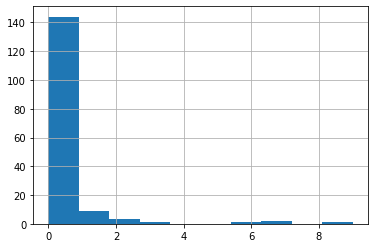

In [22]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count